# Summary

In [1]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("paper", font_scale=1.6)
sns.set_style("darkgrid")

with open(os.path.join("Results", "Results_LogisticRegression.json")) as json_file:
    Results_LogisticRegression = json.load(json_file)
with open(os.path.join("Results", "Results_DecisionTree.json")) as json_file:
    Results_DecisionTree = json.load(json_file)
with open(os.path.join("Results", "Results_RandomForest.json")) as json_file:
    Results_RandomForest = json.load(json_file)
with open(os.path.join("Results", "Results_XGBoost.json")) as json_file:
    Results_XGBoost = json.load(json_file)

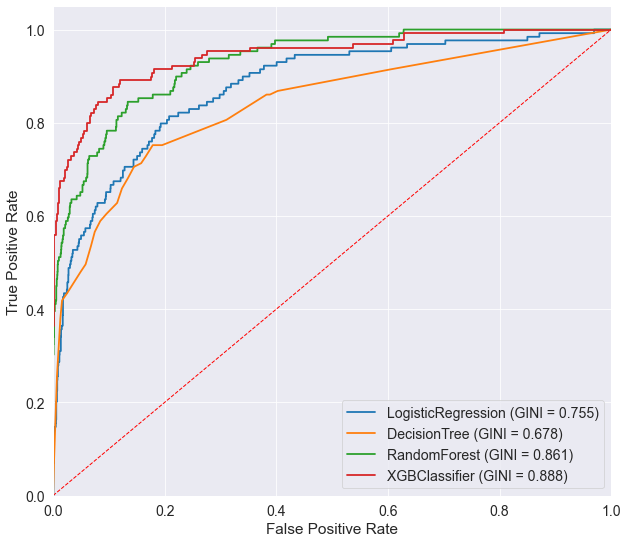

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))

fpr, tpr = Results_LogisticRegression['fpr'], Results_LogisticRegression['tpr']
ax.plot(fpr, tpr, lw=1.8, label='LogisticRegression (GINI = %0.3f)' % (Results_LogisticRegression['test_gini']))
fpr, tpr = Results_DecisionTree['fpr'], Results_DecisionTree['tpr']
ax.plot(fpr, tpr, lw=1.8, label='DecisionTree (GINI = %0.3f)' % (Results_DecisionTree['test_gini']))
fpr, tpr = Results_RandomForest['fpr'], Results_RandomForest['tpr']
ax.plot(fpr, tpr, lw=1.8, label='RandomForest (GINI = %0.3f)' % (Results_RandomForest['test_gini']))
fpr, tpr = Results_XGBoost['fpr'], Results_XGBoost['tpr']
ax.plot(fpr, tpr, lw=1.8, label='XGBClassifier (GINI = %0.3f)' % (Results_XGBoost['test_gini']))
ax.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")

plt.savefig(os.path.join("Graphs", "Summary_roc.png"), facecolor="w", dpi=100)

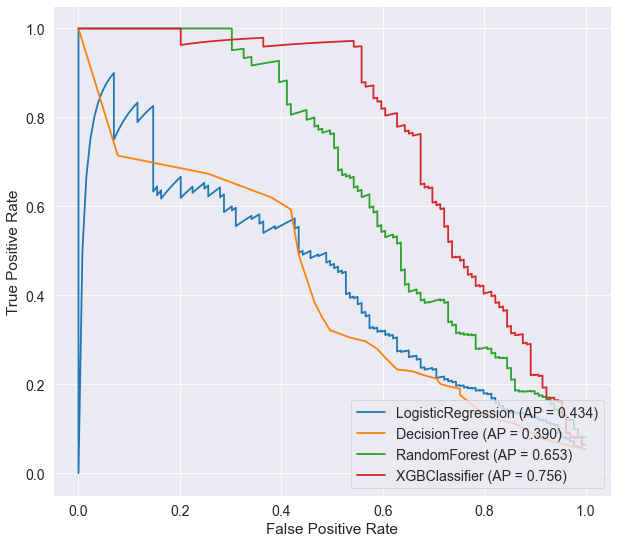

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))

precision, recall = Results_LogisticRegression['precision'], Results_LogisticRegression['recall']
ax.plot(recall, precision, lw=1.8, label='LogisticRegression (AP = %0.3f)' % (Results_LogisticRegression['test_ap']))
precision, recall = Results_DecisionTree['precision'], Results_DecisionTree['recall']
ax.plot(recall, precision, lw=1.8, label='DecisionTree (AP = %0.3f)' % (Results_DecisionTree['test_ap']))
precision, recall = Results_RandomForest['precision'], Results_RandomForest['recall']
ax.plot(recall, precision, lw=1.8, label='RandomForest (AP = %0.3f)' % (Results_RandomForest['test_ap']))
precision, recall = Results_XGBoost['precision'], Results_XGBoost['recall']
ax.plot(recall, precision, lw=1.8, label='XGBClassifier (AP = %0.3f)' % (Results_XGBoost['test_ap']))
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")

plt.savefig(os.path.join("Graphs", "Summary_prc.png"), facecolor="w", dpi=100)

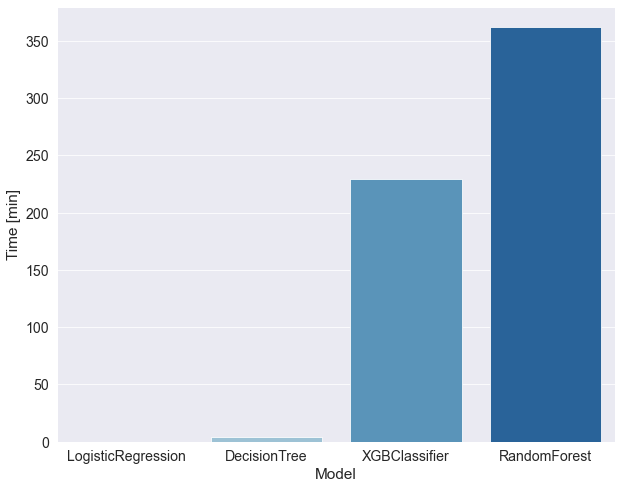

In [4]:
times = pd.concat([
    pd.Series([
        "LogisticRegression",
        "DecisionTree",
        "RandomForest",
        "XGBClassifier"], name="Model"),
    pd.Series([
        Results_LogisticRegression['optimization_time']/60,
        Results_DecisionTree['optimization_time']/60,
        Results_RandomForest['optimization_time']/60,
        Results_XGBoost['optimization_time']/60], name="Time [min]"),
], axis=1).sort_values('Time [min]')

fig, axs = plt.subplots(1, 1, figsize=[10,8])
g = sns.barplot(x='Model', y='Time [min]', data=times, palette='Blues')
# g.set_yscale("log")

plt.savefig(os.path.join("Graphs", "Summary_optimization_time.png"), facecolor="w", dpi=100)

In [5]:
gini_cv = pd.concat([
    pd.Series([
        "LogisticRegression",
        "DecisionTree",
        "RandomForest",
        "XGBClassifier"], name="Model"),
    pd.Series([
        Results_LogisticRegression['mean_test_gini'],
        Results_DecisionTree['mean_test_gini'],
        Results_RandomForest['mean_test_gini'],
        Results_XGBoost['mean_test_gini']], name="CV GINI"),
], axis=1).sort_values('CV GINI')

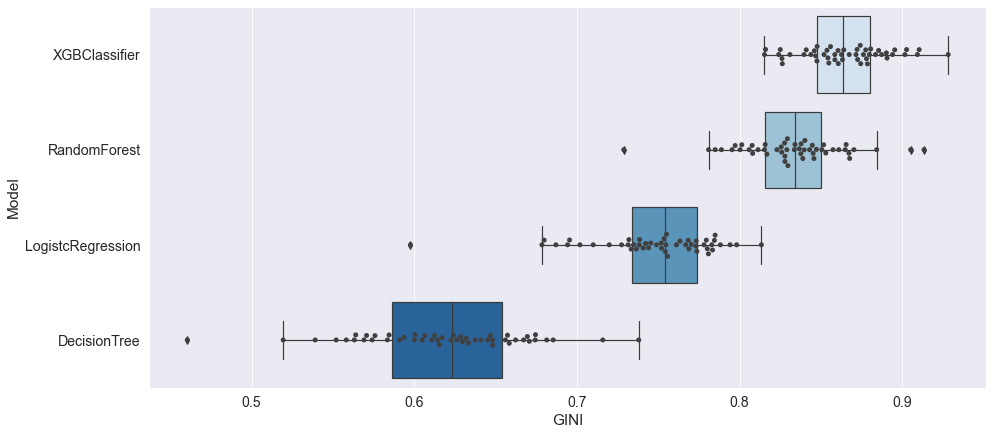

In [6]:
lr = pd.DataFrame(pd.Series(Results_LogisticRegression['mean_test_gini'], name='GINI')*2-1)
lr['Model'] = 'LogistcRegression'

dt = pd.DataFrame(pd.Series(Results_DecisionTree['mean_test_gini'], name='GINI')*2-1)
dt['Model'] = 'DecisionTree'

rf = pd.DataFrame(pd.Series(Results_RandomForest['mean_test_gini'], name='GINI')*2-1)
rf['Model'] = 'RandomForest'

xgb = pd.DataFrame(pd.Series(Results_XGBoost['mean_test_gini'], name='GINI')*2-1)
xgb['Model'] = 'XGBClassifier'

val_scores_comp = pd.concat([dt, lr, rf, xgb], axis=0).sort_values('GINI', ascending=False)

fig, axs = plt.subplots(1, 1, figsize=(15,7))
sns.boxplot(x='GINI', y='Model', data=val_scores_comp, palette="Blues")
sns.swarmplot(x='GINI', y='Model', data=val_scores_comp, color=".25")

plt.savefig(os.path.join("Graphs", "Summary_GINI_CV.png"), facecolor="w", dpi=100)